In [1]:
using Statistics, Distributions, LinearAlgebra, Random, Plots

In [146]:
#n_seed = 1990
T = 50
mu = 0.0003
N_t0 = 1000
W_max = 12.0
gr = 0.025
Tw = 5.0
mW_t0 = 2.0 
sdW_t0 = 0.5;

In [163]:
function farm_salmon_sim(N_t0, T, mu, mW_t0, sdW_t0, W_max, gr, Tw)
    D_weight = Normal(mW_t0, sdW_t0)
    M_rate = Bernoulli(mu)
    W_t0 = rand(D_weight,N_t0)
    W = hcat(W_t0,zeros(N_t0,T))
    H = zeros(N_t0,T+1)
    
    for i in 2:(T+1)
        mu = max(0.0,mu + rand(Normal(0.0,0.0001)))
        gr = max(0.0,gr .+ rand(Normal(0.0,0.005)))
        d_rate = ifelse.(W[:,i-1] .!= 0, abs.(rand(M_rate,N_t0) .-1),0.0) 
        g_rate = (1.0 .+ gr .* (1.0 .- W[:,i-1] ./ W_max)) 
        W[:,i] = g_rate .* W[:,i-1] .* d_rate
        h_rate = ifelse.(W[:,i] .>= Tw, 0, 1)
        H[:,i] = W[:,i] .* abs.(h_rate .- 1)
        W[:,i] = W[:,i] .* h_rate
    end
    
    return (W = W, H = H, Hs = vec(sum(H,dims = 1)), Nh = sum(H .!= 0, dims = 1))
end

farm_salmon_sim (generic function with 2 methods)

In [164]:
test = [farm_salmon_sim(N_t0, T, mu, mW_t0, sdW_t0, W_max, gr, Tw).Hs for j in 1:300];

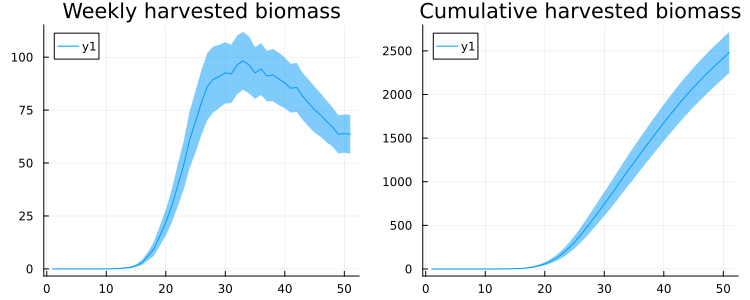

In [191]:
MW = map(mean, eachcol(stack(test, dims = 1)))
SW = map(std, eachcol(stack(test, dims = 1)))

cMW = map(mean,eachcol(stack(cumsum.(test), dims = 1)))
cSW = map(std,eachcol(stack(cumsum.(test), dims = 1)))

p1 = plot(1:(T+1), MW, ribbon = 1.96 .* SW ./ sqrt(300), title = "Weekly harvested biomass")
p2 = plot(1:(T+1), cMW, ribbon = 1.96 .* cSW ./ sqrt(300), title = "Cumulative harvested biomass")
plot(p1, p2, layout=(1,2), size=(750,300))